# Signed Fruchterman-Reingold layout

Based on the word-famous Fruchterman-Reingold algorithm for network visualization, this (naive) adaptation for signed networks considers <span style="color:blue">attractive</span> forces for <span style="color:blue">positive</span> edges and <span style="color:red">repulsive</span> forces for <span style="color:red">negative</span> edges. This approach helps visualize the structural relationships and tensions within the network, highlighting both cohesion and division among communities.

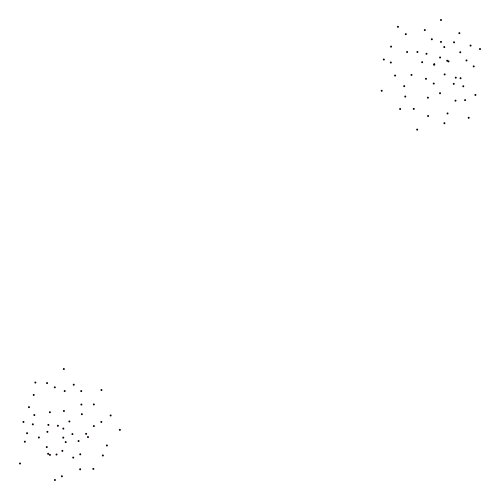

In [1]:
from src.layout import *
from src.utils import *

# Generate a signed polarized network with 50 nodes per community
g = generate_signed_polarized_network(num_nodes_per_community=50)

# Apply the signed Fruchterman-Reingold layout algorithm
layout = signed_fruchterman_reingold(g)


visual_style = {}
visual_style["vertex_size"] = 10/np.sqrt(g.vcount())
visual_style["edge_color"] = ['blue' if sign == 1 else 'red' for sign in g.es['sign']]
visual_style["edge_width"] = 2/np.sqrt(g.ecount())
visual_style["bbox"] = (500, 500)
visual_style["layout"] = layout

ig.plot(g, **visual_style)


### How to use your own edgelist

In [2]:
df= pd.read_csv('data/mickey_and_friends.tsv', sep='\t',index_col=0)

edgelist = edgelist_from_adjacency_matrix(df)
edgelist

,source,target,weight
0,Mickey Mouse,Minnie Mouse,1
1,Mickey Mouse,Donald Duck,1
2,Mickey Mouse,Goofy,1
3,Mickey Mouse,Pluto,1
4,Mickey Mouse,Pete,-1
...,...,...,...
79,Trudy,Goofy,-1
80,Trudy,Clarabelle Cow,-1
81,Trudy,Pete,1
82,Trudy,The Phantom Blot,1


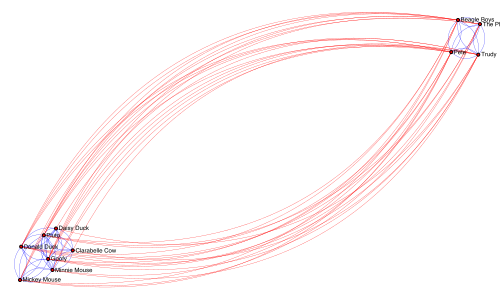

In [17]:
g = graph_from_edgelist(edgelist)
layout = signed_fruchterman_reingold(g)

visual_style = {}
visual_style["vertex_size"] = 10/np.sqrt(g.vcount())
visual_style["edge_color"] = ['blue' if sign == 1 else 'red' for sign in g.es['sign']]
visual_style["edge_width"] = 2/np.sqrt(g.ecount())
visual_style["bbox"] = (500, 300)
visual_style["layout"] = layout
visual_style["vertex_label"] = g.vs['name']
visual_style["vertex_label_size"] = 6
visual_style["vertex_label_dist"] = 2

ig.plot(g, **visual_style, vertex_label_angle=0, vertex_label_color='black')
